# Linear Regression

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [24]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [2]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:, np.newaxis]  # np.newaxis: (506,) -> (506, 1)

print('샘플 개수: ', X.shape[0])

샘플 개수:  506


In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [5]:
print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


h: hypothesis를 의미. 즉, $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$
<br>
cost: $\frac{1}{2N}\Sigma^{N}_{i=1}(h(x_{i})-y_{i})^2$

In [7]:
# Linear Regression 비용함수 (최소제곱법)
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params  # @: 내적
    return (1/(2*n_samples)) * np.sum((h-y)**2)

Gradient update
<br>
$\theta = \theta - \alpha \frac{\partial J(x)}{\partial \theta}$
<br>
$J(x)= \frac{1}{2N}\Sigma^{N}_{i=1}(h(x_{i})-y_{i})^2$
<br>
$J(x)= \frac{1}{2N}[(h(x_1)-y_1)^2 + (h(x_2)-y_2)^2 + (h(x_3)-y_3)^2 + ... + (h(x_n)-y_n)^2)]$
<br>
$\frac{\partial J(x)}{\partial \theta_i} = 2\frac{1}{2N}(h(x_i)-y_i)(x_i) $

In [22]:
# 경사하강법 -> Loss가 가장 적은 점까지 params 업데이트
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters, 1))
    
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y)
        J_history[i] = compute_cost(X, y, params)  # Loss값 기록
    
    return (J_history, params)

### Normalization vs Standardization vs Regularization

#### Normalization
- 값의 범위(scale)를 0 ~ 1 사이의 값을 바꾸는 것이다.
- 학습 전에 scaling한다.
    - 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지한다.
    - 딥러닝에서 Local Minima에 빠질 위험을 감소시킨다.(학습 속도 향상)
- Scikit-learn에서 MinMaxScaler
$$ \frac{x - x_{min}}{x_{max} - x_{min}} $$

#### Standardization
- 값의 범위(scale)를 평균이 0, 분산이 1이 되도록 변환한다.
- 학습 전에 scaling한다.
    - 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지한다.
    - 딥러닝에서 Local Minima에 빠질 위험을 감소시킨다.(학습 속도 향상)
- 정규분포를 표준정규분포로 변환하는 것과 같다.
    - Z-score(표준 점수)
    - -1 ~ 1 사이에 68%, -2 ~ 2 사이에 95%, -3 ~ 3 사이에 99%
    - -3 ~ 3의 범위를 벗어나면 outlier일 확률이 높다.
- 표준화로 번역하기도 한다.
- Scikit-learn에서 StandardScaler
$$ \frac{x - \mu}{\sigma} $$

#### Regularization
- weight를 조정하는데 규제를 거는 기법이다.
- Overfitting을 막기 위해 사용한다.
- L1 regularization, L2 regularization 등
    - L1: LASSO(라쏘), 마름모
    - L2: RIDGE(릿지), 원
$$ Loss = \frac{1}{n}\sum_{i=1}^n \{(y-\hat{y})^2 + \frac{\lambda}{2}|w|^2 \} $$

In [11]:
# standardization 요소 준비
n_samples = len(y)
mu = np.mean(X, 0)
sigma = np.std(X, 0)

print('개수: ', n_samples)
print()
print('각 컬럼의 평균: \n', mu)
print()
print('각 컬럼의 표준편차: \n', sigma)

개수:  506

각 컬럼의 평균: 
 [3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]

각 컬럼의 표준편차: 
 [8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


In [12]:
print('Standardization 이전: ')
print(X)
X = (X-mu) / sigma
print('Standardization 이후: ')  # 평균: 0, 분산: 1
print(X)

Standardization 이전: 
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Standardization 이후: 
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [13]:
np.ones((n_samples, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [14]:
X = np.hstack((np.ones((n_samples, 1)), X))  # bias를 추가해줍니다: y = ax + b -> b
n_features = np.size(X, 1)
params = np.zeros((n_features, 1))

In [15]:
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [16]:
n_features

14

In [17]:
params

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
print(X.shape)
print(params.shape)
print(n_features)

(506, 14)
(14, 1)
14


첫 Loss:  296.0734584980237 

업데이트 된 파라미터: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

최종 Loss:  [11.00713381]


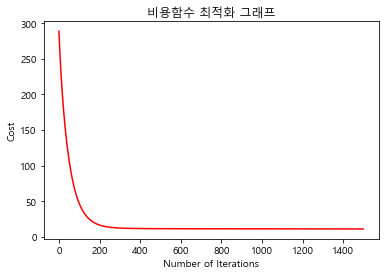

In [25]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print('첫 Loss: ', initial_cost, '\n')

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print('업데이트 된 파라미터: \n', optimal_params, '\n')

print('최종 Loss: ', J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')
plt.title("비용함수 최적화 그래프")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Linear Regression 클래스화

In [37]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):
        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones((self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):
        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]
        return self
    
    # 결정계수(R-Squared)
    # 회귀모델에서 독립변수가 종속변수를 얼만큼 설명해 주는지 가리키는 지표
    # 설명력이라고 부르기도 한다.
    # 결정계수가 높을수록 독립변수가 종속변수를 많이 설명한다는 뜻
    # 이 계수는 독립변수의 수가 증가하면 상승한다.
    # 실제로 종속변수를 잘 설명하지 못하는 변수가 추가되어도 증가하기 때문에 결정계수만 가지고 회귀 모델의 유용성을 판단하는 것은 다소 문제가 있다.
        # -> 조정된 결정계수(Adjusted R-Squared)를 사용함
    # 결정계수가 0.3(30%)이라고 하면 독립변수가 종속변수의 30% 정도를 설명한다는 뜻이다.
    # 몇 퍼센트 이상이 유용하다고 말하기는 어렵지만 일반적으로 20%는 넘어야 한다고 보고, 외생변수를 최대한 통제하는 설계를 기반으로 조사된 데이터에서는 더 높은 수치가 나와야 한다.
    
    # 결정계수 계산 방법: R^2 = (SSE/SST) = 1 - (SSR/SST)
    # SST(Total Sum of Squares) = \sum_{i=1}^n(y_i = \bar{y})^2
        # SST는 관측값에서 관측값의 평균(혹은 추정치의 평균)을 뺀 결과의 총합
    # SSE(Explained Sum of Squares) = \sum_{i=1}^n(\hat{y_i} - \bar{y})^2
        # SSE는 추정값에서 관측값의 평균(혹은 추정치의 평균)을 뺀 결과의 총합
    # SSR(Residual Sum of Squares) = \sum_{i=1}^n(y_i - \hat{y_i})^2
        # SSR은 관측값에서 추정값을 뺀 값, 즉 잔차의 총합
    def score(self, X=None, y=None):
        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression(X_train, y_train).fit()
train_accuracy = regressor.score()
test_accuracy = regressor.score(X_test, y_test)

print('train accuracy: ', train_accuracy)
print('test accuracy: ', test_accuracy)

train accuracy:  0.7434822344695983
test accuracy:  0.6753466437353814
